# Exercises 02

## Exercise 02.1
The first exercise consists of calculate the following integral:
$$ I = \int_0^1{dx \frac{\pi}{2} \cos \left(\frac{\pi}{2} x \right)} = 1$$
by using numerical Monte Carlo methods.
\
I decided to use three different numerical Monte Carlo methods:
1. sampling a uniform distribution in $[0, 1)$
2. importance sampling and the inversion of the cumulative function
3. importance sampling and the accept-reject method to sample the pdf.

I wrote three .dat files containing the data produced in the c++ simulation.

1. I produced 100 measures of the integral by throwing, following a uniform distribution, a total of $10^4$ pseudo-random numbers in the chosen interval in order to get each measure.

2. The second method corresponds to my first importance sampling expertiment, in order to get an invertible cumulative function I chose as a pdf the Taylor's expansion to the first order of the integrand function in the point $x = 1/2$, after normalizing the result, I obtaind the following pdf $ p(x) = 1 - \frac{\pi}{2}\left(x-\frac{1}{2}\right)$. This function has every property necessary to be a good pdf for importance sampling, in deed, it's non-negative in $[0, 1)$, it's normalized at $1$ in the interval and it's similar to the integrand, because it comes from its Taylor's expansion.

3. The third method merges two different techniques: the importance sampling and the accept-reject for a non-invertible cumulative function. As a pdf I chose $p(x) = \frac{3}{2}(1 - x^2)$ which nullifies on the border of the interval.

Then, applying the data block treatment at each method, I obtained the following results and the corresponding uncertainties.

Uniform sampling:
	Integral = 1.0 +/- 1e-05
Importance sampling:
	Integral = 1.0 +/- 4e-06
Importance sampling & Accept-Reject:
	Integral = 1.0 +/- 2e-06


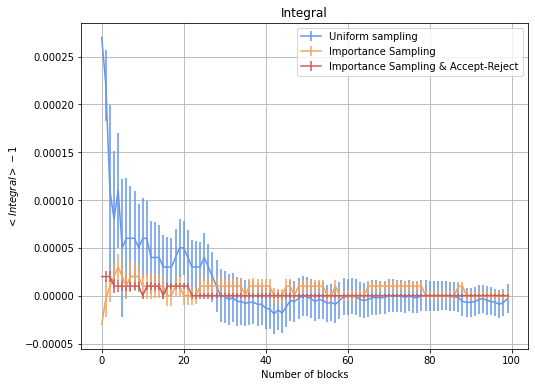

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)

# 1.
data_un = np.loadtxt("./dataEx1/output_standard.dat", usecols=2)
sigma_un = np.loadtxt("./dataEx1/output_standard.dat", usecols=3)
# 2.
data_is = np.loadtxt("./dataEx1/output_importance.dat", usecols=2)
sigma_is = np.loadtxt("./dataEx1/output_importance.dat", usecols=3)
# 3.
data_ar = np.loadtxt("./dataEx1/output_acc_rej.dat", usecols=2)
sigma_ar = np.loadtxt("./dataEx1/output_acc_rej.dat", usecols=3)

# Print Integral results and corresponding uncertainties
print("Uniform sampling:\n\tIntegral =", round(data_un[99], 5), "+/-", round(sigma_un[99], 5))
print("Importance sampling:\n\tIntegral =", round(data_is[99], 6), "+/-", round(sigma_is[99], 6))
print("Importance sampling & Accept-Reject:\n\tIntegral =", round(data_ar[99], 6), "+/-", round(sigma_ar[99], 6))
 
fig = plt.figure(1, figsize=[8,6])

# Data Plot centred on the expected value of I = 1 (as shown in ylabel)
plt.errorbar(x, data_un - 1, yerr=sigma_un, color="cornflowerblue")
plt.errorbar(x, data_is - 1, yerr=sigma_is, color="sandybrown")
plt.errorbar(x, data_ar - 1, yerr=sigma_ar, color="indianred")
plt.legend(["Uniform sampling", "Importance Sampling", "Importance Sampling & Accept-Reject"], loc=0)
plt.title("Integral")
plt.xlabel("Number of blocks")
plt.ylabel("$<Integral> - 1$")
plt.grid()
plt.show()

The cumulative function calculated from the pdf given in point 2. is 

$$ F_p(x) = \int_0^x{du \left[1 - \frac{\pi}{2}\left(u-\frac{1}{2}\right) \right]} = \left( 1 + \frac{\pi}{4} \right) x - \frac{\pi}{4} x^2 $$

The inversion of the cumulative function gives

$$ x = \frac{(1 + \pi/4) - \sqrt{(1 + \pi/4) - \pi y}}{ \pi / 2} $$

where $y$ has been uniformly sampled in $[0, 1)$.


In order to give an esteem of the advantage due to the importance sampling, I decided to fit the uncertainties for each step, excluding step 1 which has uncertainty fixed to $0$. The expected law of the standard deviation of the mean is $\varepsilon = \frac{\sigma}{\sqrt{N}}$ where $\sigma$ is the standard deviation of the measure produced and $N$ is the number of steps.

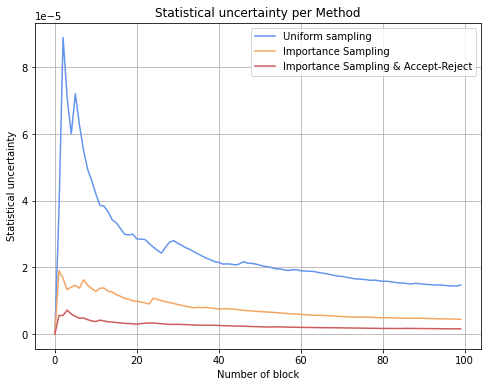

In [2]:
x = np.arange(100)

# 1.
sigma_un = np.loadtxt("./dataEx1/output_standard.dat", usecols=3)
# 2.
sigma_is = np.loadtxt("./dataEx1/output_importance.dat", usecols=3)
# 3.
sigma_ar = np.loadtxt("./dataEx1/output_acc_rej.dat", usecols=3)

plt.figure(1, figsize=[8, 6])

plt.plot(x, sigma_un, color="cornflowerblue")
plt.plot(x, sigma_is, color="sandybrown")
plt.plot(x, sigma_ar, color="indianred")
plt.legend(["Uniform sampling", "Importance Sampling", "Importance Sampling & Accept-Reject"], loc=0)
plt.title("Statistical uncertainty per Method")
plt.xlabel("Number of block")
plt.ylabel("Statistical uncertainty")
plt.grid()
plt.show()

The results are very similar to the expected ones, in deed, the law of power is approximately $N^{-1/2}$ and the constants are the expected order relation, the uniform distribution sampling is the most inefficient method to sample a random value to calculate the integral, followed by the importance sampling with the inversion of the cumulative of the Taylor's expansion at the first order in $x = 1/2$ and, the most efficient way to use the importance sampling is combining this method with the accept-reject in order to use the wanted pdf, more similar to the integrand than the one used at point 2.

## Exercise 02.2
The second exercise consists of studying the root mean squared position of a Random walker for each of the 100 steps in a cubic lattice and in the continuum.
\
The total number of the random walks is 10000 divided in 100 blocks made of 100 random walks each.
\
The expected results are a diffusive behavior for both the random walks, in particular we expect a diffusive function dependent on the step $a$ and the number of steps $N$: $\sqrt{\langle |\vec{r}_N|^2 \rangle} = a \sqrt{N}$.
\
I wrote two .dat files containing the data produced in the c++ simulation.

Fit function = 1.0 * ( N ^ 0.5 )


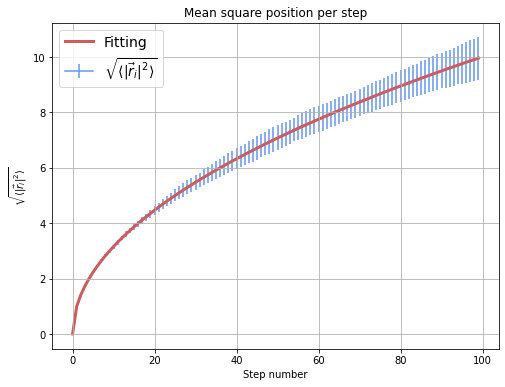

In [3]:
from scipy.optimize import curve_fit

def func(x, a, b):
   return a * x ** b

data_latt = np.loadtxt("./dataEx2/output_lattice.dat", usecols = 1)
sigma_latt = np.loadtxt("./dataEx2/output_lattice.dat", usecols = 2)
x = np.arange(100)

popt, pcov = curve_fit(func, x, data_latt)
y_fit = func(x, popt[0], popt[1])

print("Fit function =", round(popt[0],1), "* ( N ^", round(popt[1],2), ")")

plt.figure(1, figsize=[8, 6])

plt.errorbar(x, data_latt, yerr=sigma_latt, color="cornflowerblue", zorder=0)
plt.plot(x, y_fit, color="indianred", zorder=1, lw=3)
plt.legend(["Fitting", r"$\sqrt{\langle |\vec{r}_i|^2 \rangle}$"], loc=0, fontsize=14)
plt.title("Mean square position per step")
plt.xlabel("Step number")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_i|^2 \rangle}$")
plt.grid()
plt.show()

Fit function = 1.0 * ( N ^ 0.5 )


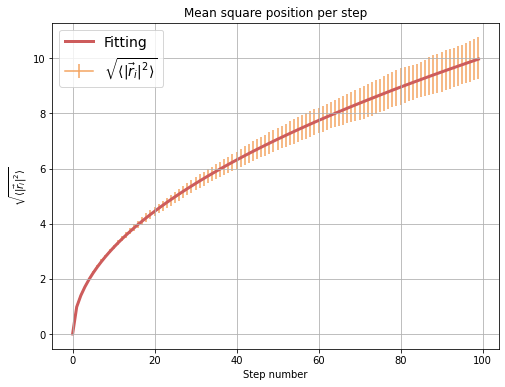

In [4]:
data_cont = np.loadtxt("./dataEx2/output_continuum.dat", usecols = 1, dtype=float)
sigma_cont = np.loadtxt("./dataEx2/output_continuum.dat", usecols = 2, dtype=float)

popt, pcov = curve_fit(func, x, data_cont)
y_fit = func(x, popt[0], popt[1])

print("Fit function =", round(popt[0],1), "* ( N ^", round(popt[1],2), ")")

plt.figure(1, figsize=[8, 6])

plt.errorbar(x, data_cont, yerr=sigma_cont, color="sandybrown", zorder=0)
plt.plot(x, y_fit, color="indianred", zorder=1, lw=3)
plt.legend(["Fitting", r"$\sqrt{\langle |\vec{r}_i|^2 \rangle}$"], loc=0, fontsize=14)
plt.title("Mean square position per step")
plt.xlabel("Step number")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_i|^2 \rangle}$")
plt.grid()
plt.show()

The results obtained for both the lattice and continuum random walks are very similar to the expected ones, in fact, the constant which should be the lattice spacing or the continuum step is very similar to the fixed step ($a = 1$) and the power law is approximately $N^{1/2}$ for both random walks.